# Importing libraries and the data set. 

In [182]:
#Loading all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression as LR
warnings.filterwarnings('ignore')

In [183]:
#Reading the dataset
df = pd.read_csv('vehicle.csv')
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

# Exploring the data set 

In [184]:
df.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   841.000000            842.000000    840.000000   
mean     93.678487    44.828775             82.110451    168.888095   
std       8.234474     6.152172             15.778292     33.520198   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            844.000000               846.000000     845.000000   
mean              61.678910                 8.567376     168.901775   
std                7.891463                 4.601217      33.214848   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     845.000000              843.000000                 846.000000   
mean       40.933728               20.582444                 147.998818   
std         7.816186                2.592933                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       843.000000         844.000000                 844.000000   
mean        188.631079         439.494076                 174.709716   
std          31.411004         176.666903                  32.584808   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.000000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         587.000000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   842.000000      840.000000        845.000000   
mean                     72.447743        6.364286         12.602367   
std                       7.486190        4.920649          8.936081   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio  
count        845.000000     846.000000  
mean         188.919527     195.632388  
std            6.155809       7.438797  
min          176.000000     181.000000  
25%          184.000000     190.250000  
50%          188.000000     197.000000  
75%          193.000000     201.000000  
max          206.000000     211.000000

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [186]:
df.isnull().sum().sum()

41

From above we can see that there are some missing values in different columns

Filling these missing values with their column mean

In [187]:
#Calculating the mean
df.mean()

compactness                     93.678487
circularity                     44.828775
distance_circularity            82.110451
radius_ratio                   168.888095
pr.axis_aspect_ratio            61.678910
max.length_aspect_ratio          8.567376
scatter_ratio                  168.901775
elongatedness                   40.933728
pr.axis_rectangularity          20.582444
max.length_rectangularity      147.998818
scaled_variance                188.631079
scaled_variance.1              439.494076
scaled_radius_of_gyration      174.709716
scaled_radius_of_gyration.1     72.447743
skewness_about                   6.364286
skewness_about.1                12.602367
skewness_about.2               188.919527
hollows_ratio                  195.632388
dtype: float64

In [188]:
#Filling missing values with the mean
df.fillna(df.mean(), inplace=True)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

In [190]:
#Checking for any missing or null value
df.isnull().sum().sum()

0

There are no missing or null values in the data set now

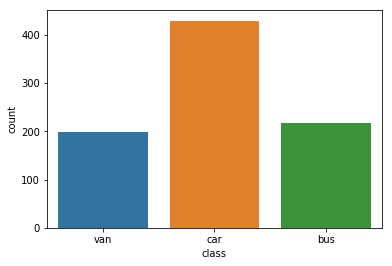

In [192]:
sns.countplot(df['class'])

In [193]:
#Separating the independent and the dependent variables
X = df.drop('class', axis = 1)
y = df['class']

In [194]:
#Standardizing the independent variables
X_std = (X-np.mean(X,axis = 0))/np.std(X,axis = 0)

X_std.shape

(846, 18)

# Checking for outliers 

In [195]:
#Removing Outliers with the help of IQR

#1st quantile
Q1 = X_std.quantile(0.25)

#3rd quantile
Q3 = X_std.quantile(0.75)

IQR = Q3 - Q1

# Print IQR for each column
print(IQR)

compactness                    1.579662
circularity                    1.468113
distance_circularity           1.779857
radius_ratio                   1.617675
pr.axis_aspect_ratio           1.015556
max.length_aspect_ratio        0.652387
scatter_ratio                  1.537276
elongatedness                  1.665185
pr.axis_rectangularity         1.546314
max.length_rectangularity      1.516502
scaled_variance                1.595575
scaled_variance.1              1.522511
scaled_radius_of_gyration      1.506442
scaled_radius_of_gyration.1    1.071806
skewness_about                 1.428499
skewness_about.1               1.568537
skewness_about.2               1.463765
hollows_ratio                  1.445981
dtype: float64


In [196]:
requiredColumns = (IQR.to_frame().T.columns)
X_std = X_std[requiredColumns]
X_std.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.517302              0.056545      0.272965   
1    -0.325470    -0.624564              0.120112     -0.835442   
2     1.254193     0.843549              1.518571      1.201630   
3    -0.082445    -0.624564             -0.007021     -0.296217   
4    -1.054545    -0.135193             -0.769817      1.081803   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310206                 0.311542      -0.208038   
1             -0.593962                 0.094079      -0.599893   
2              0.548539                 0.311542       1.148382   
3              0.167705                 0.094079      -0.750606   
4              5.245485                 9.444962      -0.599893   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136580               -0.225160                   0.758332   
1       0.520853               -0.611739                  -0.344578   
2      -1.144331                0.934576                   0.689401   
3       0.648945               -0.611739                  -0.344578   
4       0.520853               -0.611739                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.403077          -0.343028                   0.285618   
1        -0.594546          -0.620879                  -0.513719   
2         1.096764           1.108603                   1.392391   
3        -0.913661          -0.739958                  -1.466773   
4         1.671171          -0.649231                   0.408593   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327938       -0.074340          0.380665   
1                    -0.059987        0.537873          0.156589   
2                     0.073989        1.558230         -0.403603   
3                    -1.265769       -0.074340         -0.291565   
4                     7.308682        0.537873         -0.179527   

   skewness_about.2  hollows_ratio  
0         -0.312193       0.183957  
1          0.013088       0.452977  
2         -0.149552       0.049447  
3          1.639494       1.529056  
4         -1.450677      -1.699181

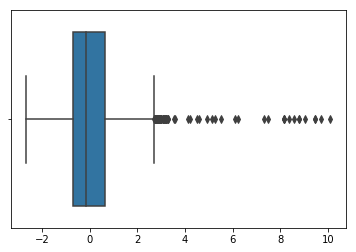

In [233]:
#Boxplot of the data set with the outliers
sns.boxplot(X_std)

In [198]:
#Applying IQR on the independent variables
X_new = X_std[~((X_std < (Q1 - 1.5 * IQR)) |(X_std > (Q3 + 1.5 * IQR))).any(axis=1)]

In [199]:
#Compare original Vs new dataset
print(X_std.shape)
print(X_new.shape)

(846, 18)
(802, 18)


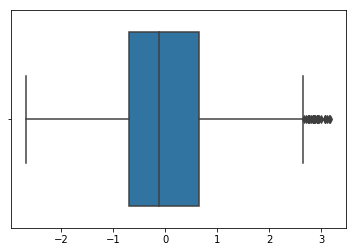

In [200]:
#Boxplot of the data set without the outliers
sns.boxplot(X_new)

From the above Box Plot we can see that almost all the outliers have been removed except for those which ahve values almost equal to the Upper Whisker.

# Finding the relationship between Independent Variables

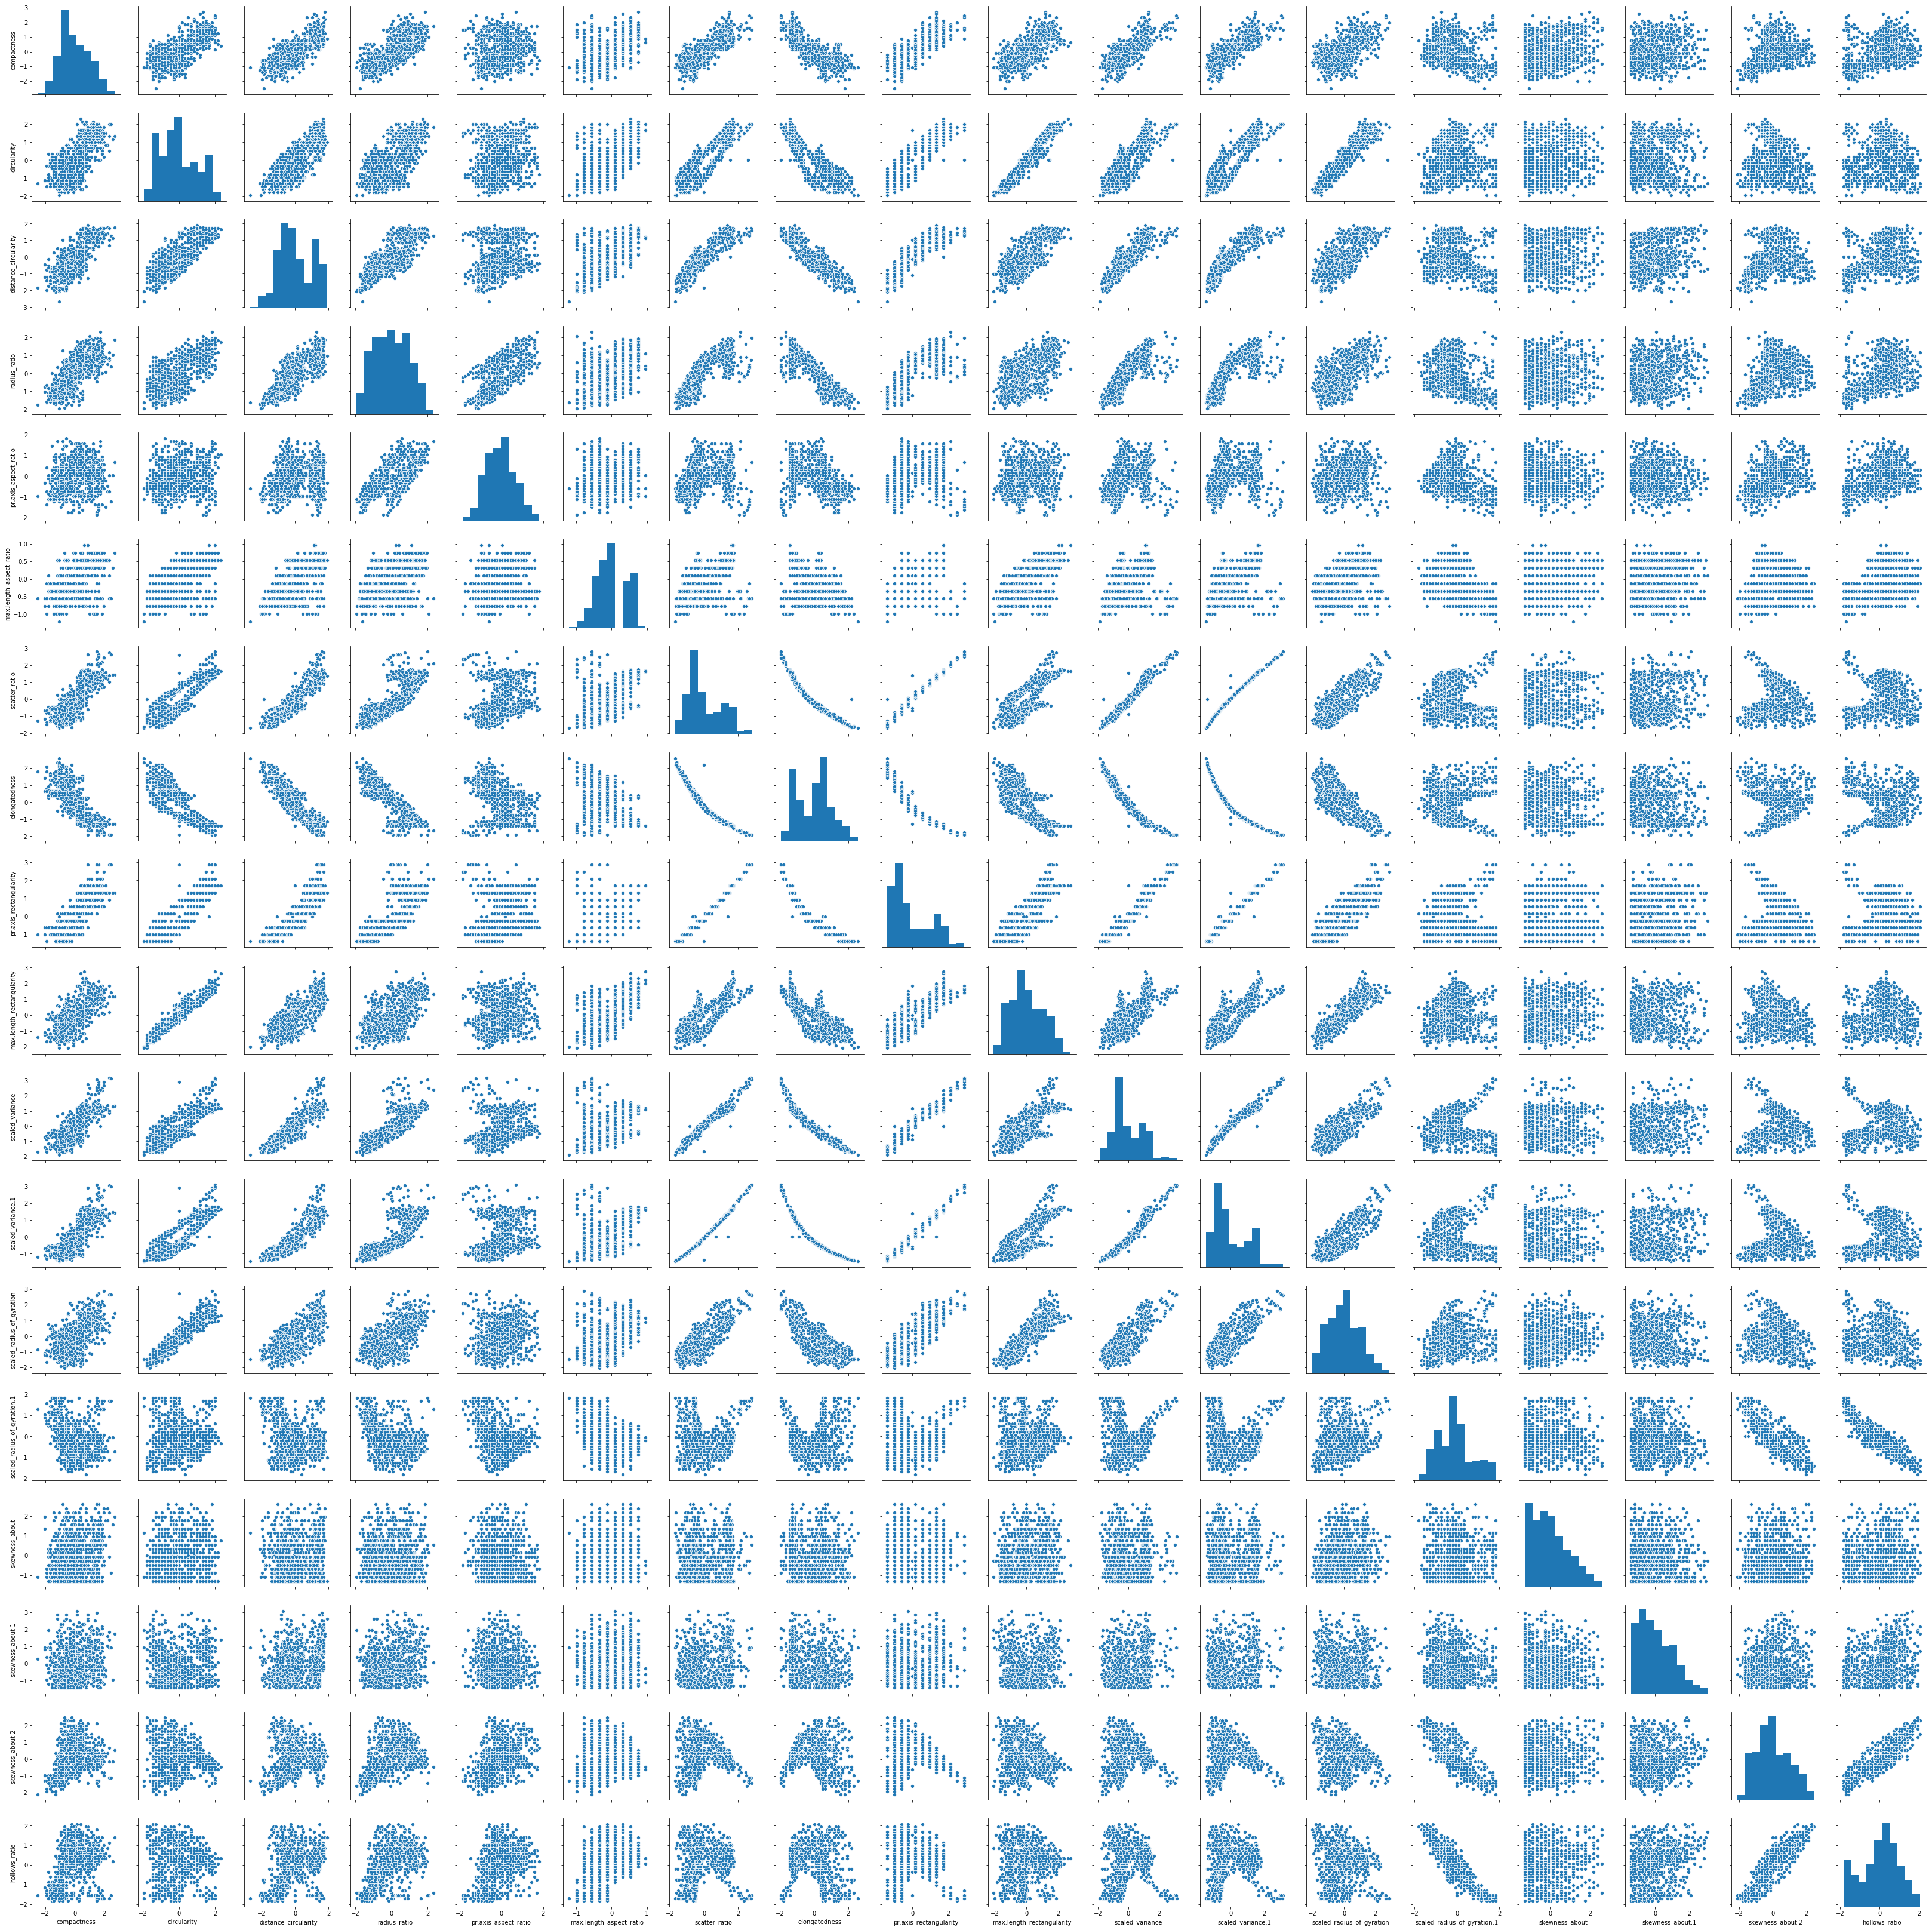

In [201]:
#Plotting the pair plot
sns.pairplot(X_new)

In [202]:
#Checking the Correlation

Q = X_new.corr()
Q

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.678850              0.782570   
circularity                     0.678850     1.000000              0.788090   
distance_circularity            0.782570     0.788090              1.000000   
radius_ratio                    0.742660     0.639431              0.804819   
pr.axis_aspect_ratio            0.194572     0.200279              0.237394   
max.length_aspect_ratio         0.492538     0.560346              0.666348   
scatter_ratio                   0.808314     0.846666              0.905351   
elongatedness                  -0.785393    -0.816861             -0.907551   
pr.axis_rectangularity          0.810092     0.845316              0.896040   
max.length_rectangularity       0.669995     0.963111              0.766826   
scaled_variance                 0.789956     0.806948              0.884616   
scaled_variance.1               0.812791     0.839073              0.890452   
scaled_radius_of_gyration       0.574306     0.930375              0.702733   
scaled_radius_of_gyration.1    -0.236043     0.093132             -0.211904   
skewness_about                  0.191670     0.136421              0.086352   
skewness_about.1                0.158885    -0.020339              0.260065   
skewness_about.2                0.280990    -0.136939              0.103499   
hollows_ratio                   0.354541     0.023410              0.305364   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.742660              0.194572   
circularity                      0.639431              0.200279   
distance_circularity             0.804819              0.237394   
radius_ratio                     1.000000              0.662851   
pr.axis_aspect_ratio             0.662851              1.000000   
max.length_aspect_ratio          0.448998              0.120764   
scatter_ratio                    0.790941              0.199385   
elongatedness                   -0.845026             -0.300527   
pr.axis_rectangularity           0.765598              0.169158   
max.length_rectangularity        0.574370              0.143611   
scaled_variance                  0.796152              0.216309   
scaled_variance.1                0.780182              0.186942   
scaled_radius_of_gyration        0.553046              0.158113   
scaled_radius_of_gyration.1     -0.379980             -0.302611   
skewness_about                   0.029146             -0.056728   
skewness_about.1                 0.178739             -0.042161   
skewness_about.2                 0.399966              0.392595   
hollows_ratio                    0.489781              0.404151   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.492538       0.808314   
circularity                                 0.560346       0.846666   
distance_circularity                        0.666348       0.905351   
radius_ratio                                0.448998       0.790941   
pr.axis_aspect_ratio                        0.120764       0.199385   
max.length_aspect_ratio                     1.000000       0.498780   
scatter_ratio                               0.498780       1.000000   
elongatedness                              -0.499933      -0.971628   
pr.axis_rectangularity                      0.500888       0.988930   
max.length_rectangularity                   0.648889       0.804725   
scaled_variance                             0.412487       0.976956   
scaled_variance.1                           0.461679       0.993827   
scaled_radius_of_gyration                   0.408343       0.792124   
scaled_radius_of_gyration.1                -0.305151       0.020745   
skewness_about                              0.080607       0.052956   
skewness_about.1                            0.130477       0.215778   
skewness_about.2                            0.

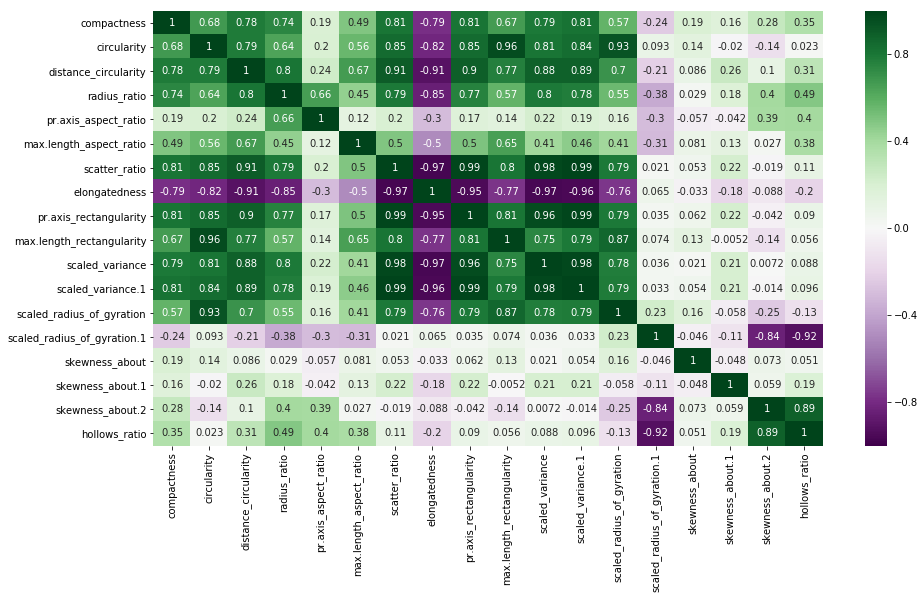

In [203]:
plt.figure(figsize=(15,8))
sns.heatmap(Q,cmap='PRGn', annot=True,vmax=1,vmin=-1)

From the Heat map we can see that 'Elongatedness' has very high correlation with almost every single variable. Other than that, there are some variables which have High Correlation and some variables with almost No Correlation.

Dropping the columns with zero almost no correlation, i.e. 'skewness_about' and 'skewness_about.1'

# Reducing dimensions using PCA 

In [223]:
#Fitting the data with PCA 

Z = X_new.drop(['skewness_about.1','skewness_about'], axis=1)#Dropping the variables with no correlation
pcamodel = PCA()
pcamodel.fit(Z)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [224]:
print(pcamodel.components_)

[[ 0.27302789  0.30053436  0.30342964  0.26082517  0.06692222  0.08374945
   0.32064359 -0.31708378  0.31778546  0.28790764  0.30619994  0.31770593
   0.27722833 -0.01763298  0.01801047  0.06421721]
 [-0.13152282  0.12812307 -0.06585975 -0.22758848 -0.19129891 -0.03891459
   0.04500922  0.01898968  0.05772972  0.11989428  0.03917788  0.0484274
   0.20607473  0.44307288 -0.55667879 -0.54717185]
 [ 0.12305035 -0.43108249  0.02006715  0.14741409 -0.04083689 -0.23766847
   0.19751027 -0.19336624  0.18439053 -0.52751926  0.28406162  0.2202937
  -0.35181091  0.17201451  0.01415713 -0.21744204]
 [-0.30895597  0.05824644 -0.13870295  0.38987829  0.78286062 -0.14047323
  -0.05249855 -0.05616812 -0.09329274 -0.0728212   0.00583563 -0.06315737
   0.16729179  0.16566219 -0.03041094 -0.13042561]
 [ 0.47889923  0.1359415  -0.47722333 -0.08875413 -0.03304247 -0.39826816
  -0.05731219  0.10157417 -0.04408043  0.05522754  0.02522543  0.01997658
   0.25338165  0.22611548  0.454643   -0.12322912]
 [-0.67

In [225]:
df_comp = pd.DataFrame(pcamodel.components_,columns=Z.columns.values)

In [226]:
#Variance contribution of each component

var = pcamodel.explained_variance_ratio_

var.round(decimals=3)

array([0.654, 0.202, 0.044, 0.04 , 0.02 , 0.015, 0.008, 0.004, 0.004,
       0.003, 0.002, 0.002, 0.001, 0.001, 0.001, 0.   ])

In [227]:
sum(var)

1.0000000000000002

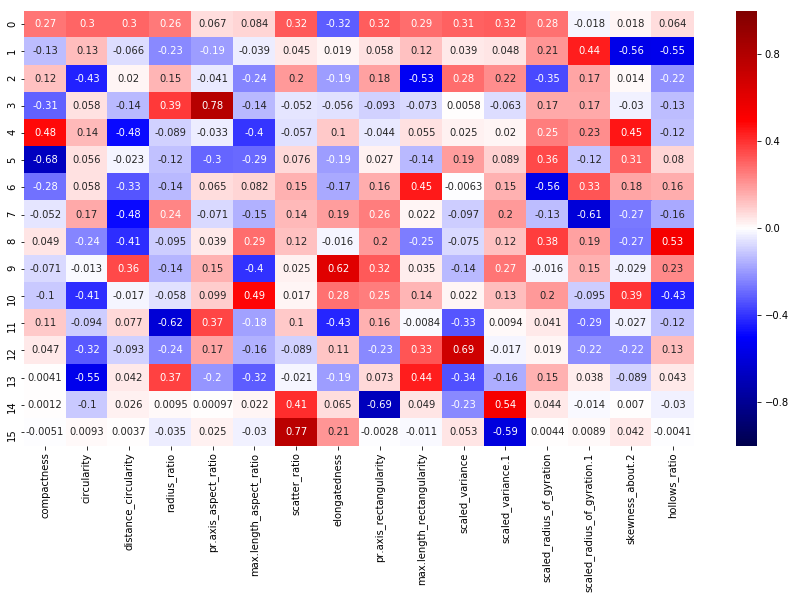

In [228]:
plt.figure(figsize=(15,8))
sns.heatmap(df_comp,cmap='seismic', annot=True,vmax=1,vmin=-1)

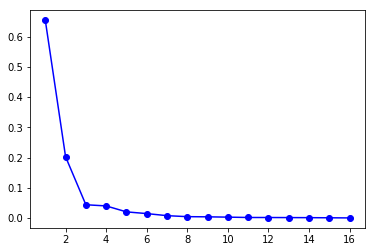

In [229]:
#Plotting the scree plot
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], var,'-bo' )

From the Scree plot we can see that around 5 or 6 components count up for the 95% of the variance.

# Data Transformation 

In [230]:
#Transforming the data
df1 = pcamodel.transform(Z)

Here we take First 5 reduced variables out of the 16 as they comprise of 95% of the total variance.

In [231]:
#Creating a new dataframe of tranformed data with the reduced number of components
df1 = pd.DataFrame(df1)
df1 = df1.iloc[:,0:5]
df1.columns = ['Reduced Component_1','Reduced Component_2','Reduced Component_3','Reduced Component_4','Reduced Component_5']
df1.head()

Reduced Component_1  Reduced Component_2  Reduced Component_3  \
0             0.292739            -0.196389            -1.191613   
1            -1.636562            -0.218084            -0.275216   
2             3.728504             0.153336             0.222603   
3            -1.786212            -2.757557            -0.453970   
4             5.967734             3.666345             2.231857   

   Reduced Component_4  Reduced Component_5  
0             1.086524            -0.196114  
1            -0.733442            -0.386517  
2             0.409617            -0.117107  
3            -0.527004            -0.178570  
4            -1.269884             0.736926

These are the reduced dimension reducted final variables out of the original 18 variables which count for the 95% of the total variance.